In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data1 = data.copy(deep= True)
data2 = data.copy(deep= True)

In [4]:
data1.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
corr = data1.corr()*100
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,100.000000,11.739631,-1.059333,-41.961817,-10.526021,17.307212,-6.301647,8.471437,-3.694943,-0.866043,3.061663,-24.768944,12.434807,-6.590202,-9.875682,-18.345327,1.190287,-7.329721,9.043813,2.897530,-5.086602,4.473573,14.405905,5.114236,-1.618187,-23.308279,-4.140710,-0.513459,-0.941269,-1.059637,-1.232257
V1,11.739631,100.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-22.770865,-10.134730
V2,-1.059333,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-53.140894,9.128865
V3,-41.961817,-0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-21.088048,-19.296083
V4,-10.526021,-0.000000,-0.000000,0.000000,100.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,9.873167,13.344749
V5,17.307212,0.000000,0.000000,-0.000000,-0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-38.635626,-9.497430
V6,-6.301647,-0.000000,0.000000,0.000000,-0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,21.598118,-4.364316
V7,8.471437,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,39.731128,-18.725659
V8,-3.694943,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-10.307910,1.987512
V9,-0.866043,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-4.424560,-9.773269


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
x = data1.drop(columns=['Time', 'Class','Amount'])
xtemp = data1.drop(columns=['Class'])
y = data1['Class']

In [8]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

In [9]:
num_components = 7
pca = PCA(n_components=num_components)
x_pca = pca.fit_transform(xscaled)

In [10]:
x_pca

array([[-0.32645836, -0.94137073, -0.85467497, ...,  0.55910687,
        -0.24467602, -0.07214743],
       [-0.79937515,  0.87052589,  0.33935613, ...,  0.21914648,
         0.17847859, -0.53398326],
       [-0.07569279, -0.63862877, -0.80222   , ..., -0.35757457,
         0.92394604,  0.31249091],
       ...,
       [-0.69633417,  0.5965961 , -0.42300847, ..., -0.9487838 ,
         0.1552726 ,  0.1843589 ],
       [-0.39291964, -1.94787572, -2.3926665 , ...,  0.15399026,
        -0.76559245,  0.56657256],
       [ 0.44867655, -0.40121998, -0.2526947 , ..., -0.50836818,
         0.35184033,  0.24100426]])

In [11]:
x_pca2 = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [22]:
x = pd.concat([x_pca2,data1[['Amount','Time']]],axis=1)

In [26]:
corr = x.corr()*100
corr.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Amount,Time
PC1,100.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,5.459279,-9.079128
PC2,0.000000,100.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-5.451549,-0.234934
PC3,0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,-2.215121,-12.118176
PC4,-0.000000,-0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,20.567364,-10.331449
PC5,0.000000,-0.000000,-0.000000,0.000000,100.000000,0.000000,0.000000,-12.982111,-11.731565
PC6,-0.000000,-0.000000,0.000000,-0.000000,0.000000,100.000000,0.000000,21.365158,-2.977394
PC7,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,-11.826514,10.256141
Amount,5.459279,-5.451549,-2.215121,20.567364,-12.982111,21.365158,-11.826514,100.000000,-1.059637
Time,-9.079128,-0.234934,-12.118176,-10.331449,-11.731565,-2.977394,10.256141,-1.059637,100.000000


In [27]:
data1 = pd.concat([x,y],axis=1)

In [30]:
data1.isnull().sum()

PC1       0
PC2       0
PC3       0
PC4       0
PC5       0
PC6       0
PC7       0
Amount    0
Time      0
Class     0
dtype: int64

In [35]:
corr = data1.corr()*100
corr.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Amount,Time,Class
PC1,100.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,5.459279,-9.079128,22.874651
PC2,0.000000,100.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-5.451549,-0.234934,-8.567541
PC3,0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,0.000000,-2.215121,-12.118176,0.122077
PC4,-0.000000,-0.000000,0.000000,100.000000,0.000000,-0.000000,0.000000,20.567364,-10.331449,21.299194
PC5,0.000000,-0.000000,-0.000000,0.000000,100.000000,0.000000,0.000000,-12.982111,-11.731565,-12.475523
PC6,-0.000000,-0.000000,0.000000,-0.000000,0.000000,100.000000,0.000000,21.365158,-2.977394,30.210617
PC7,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,-11.826514,10.256141,-12.579822
Amount,5.459279,-5.451549,-2.215121,20.567364,-12.982111,21.365158,-11.826514,100.000000,-1.059637,0.563175
Time,-9.079128,-0.234934,-12.118176,-10.331449,-11.731565,-2.977394,10.256141,-1.059637,100.000000,-1.232257
Class,22.874651,-8.567541,0.122077,21.299194,-12.475523,30.210617,-12.579822,0.563175,-1.232257,100.000000


we will be keeping the variables
- PC1, PC2, PC4, PC5, PC6, PC7
because they show high/low correlation on a medium basis and would prove to be helpful


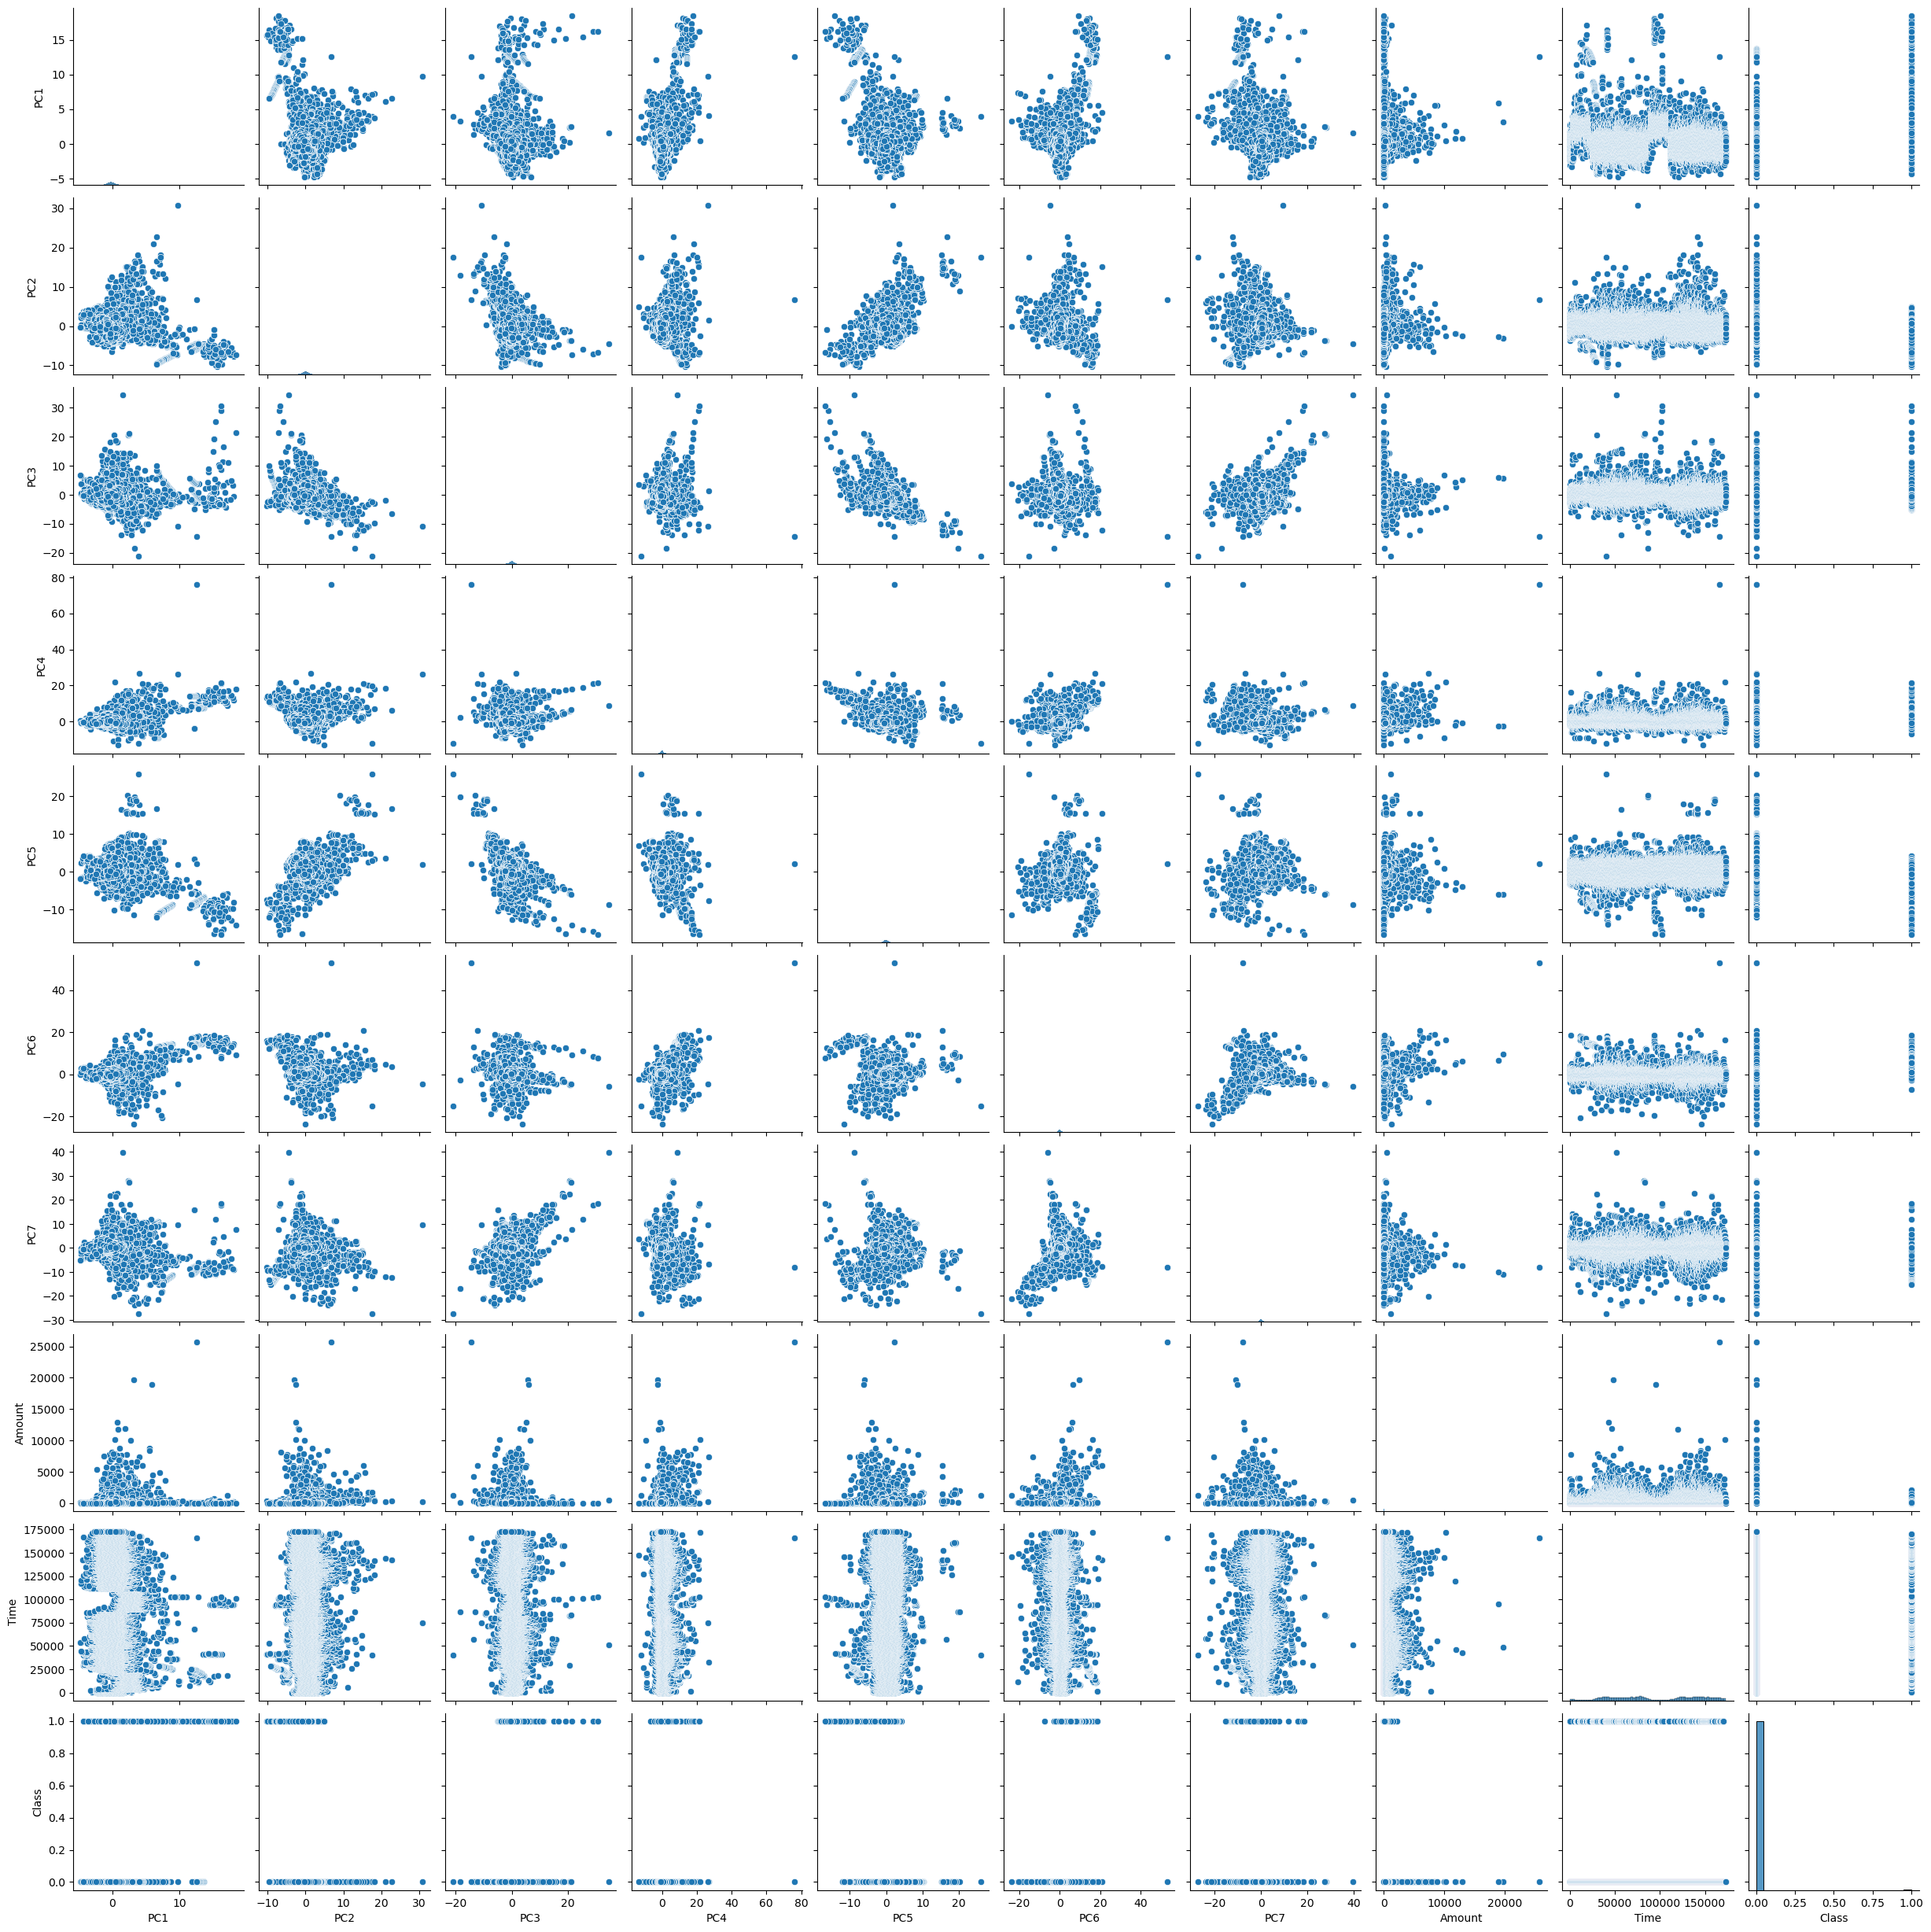

In [36]:
sns.pairplot(data1)

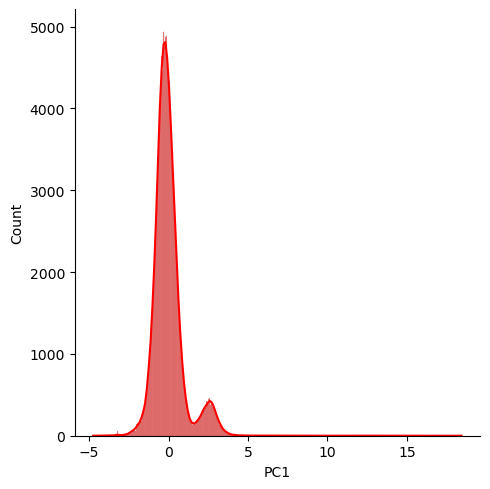

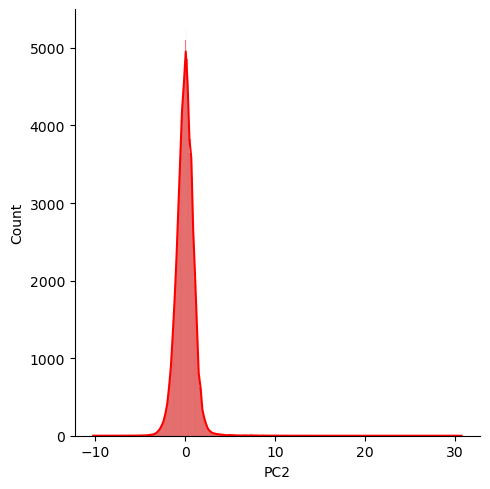

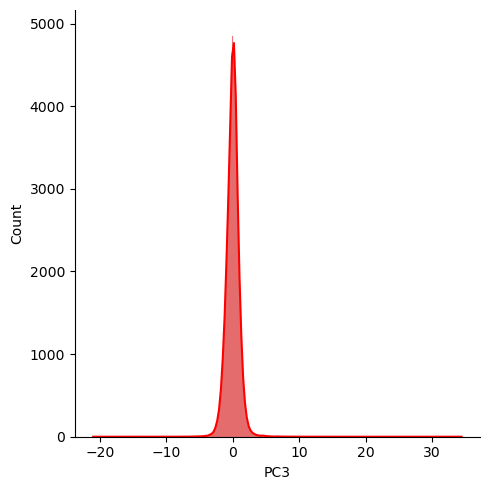

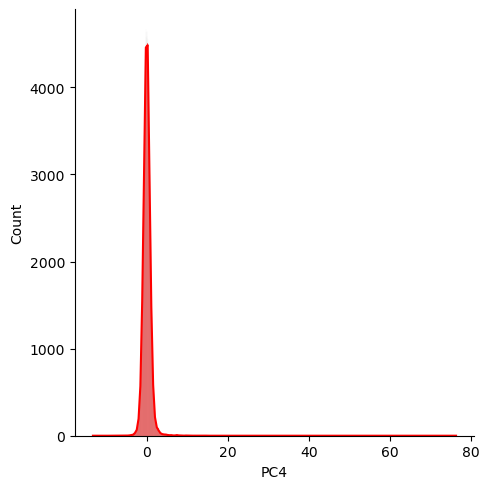

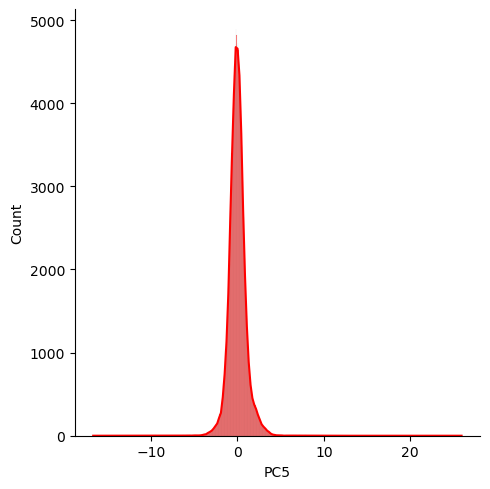

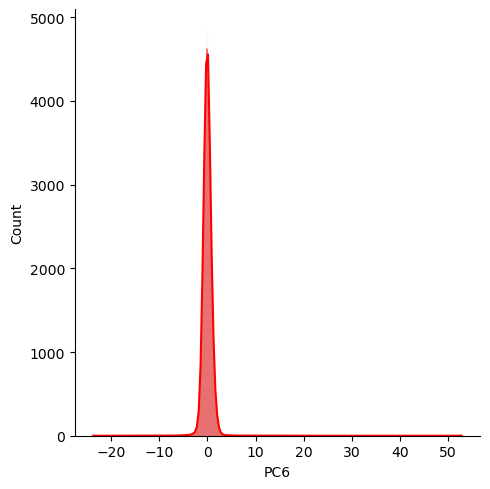

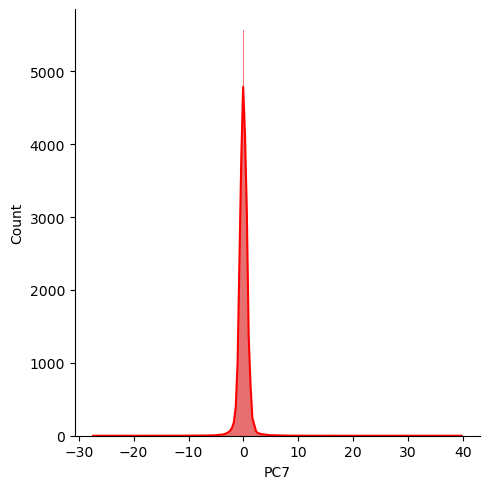

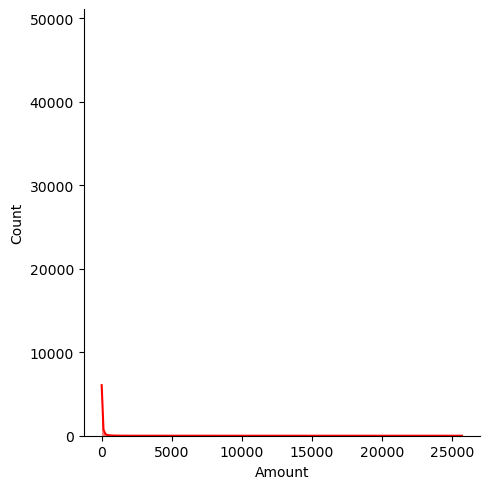

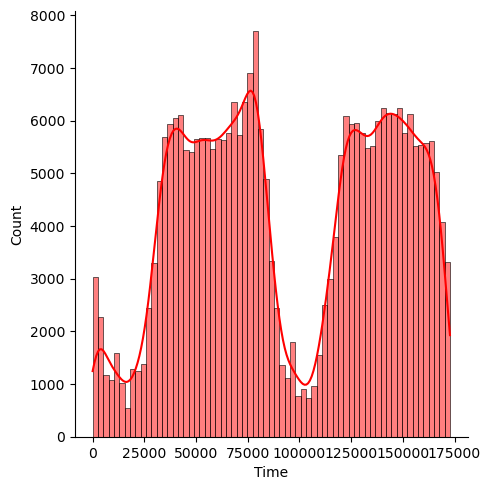

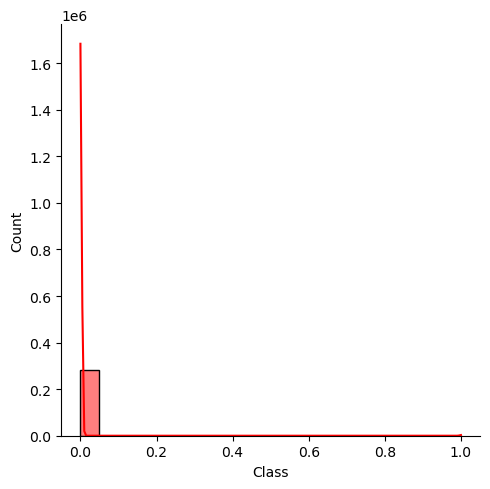

In [42]:
for i in data1:
  sns.displot(x = data1[i], kde=True, color='red')
  plt.show()

In [39]:
x = data1.drop(['Class'],axis=1)
y = data1['Class']

In [63]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=14, test_size=0.25)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC()
model5 = KNeighborsClassifier()
model6 = XGBClassifier()

In [68]:
model1.fit(train_x,train_y)

g:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
from sklearn.metrics import average_precision_score

In [80]:
pred1 = model1.predict(test_x)
auc_pr1 = average_precision_score(test_y, pred1)
print("LogisticRegression --> AUC-PR Score:", auc_pr1*100)

LogisticRegression --> AUC-PR Score: 38.7429916252706


In [ ]:
model2.fit(train_x,train_y)

In [81]:
pred2 = model2.predict(test_x)
auc_pr2 = average_precision_score(test_y, pred2)
print("DecisionTree --> AUC-PR Score:", auc_pr2*100)

DecisionTree --> AUC-PR Score: 47.59122972852497


In [82]:
model3.fit(train_x,train_y)

RandomForestClassifier()

In [93]:
pred3 = model3.predict(test_x)
auc_pr3 = average_precision_score(test_y, pred3)
print("RandomForest --> AUC-PR Score:", auc_pr3*100)

RandomForest --> AUC-PR Score: 71.57996746018635


In [83]:
model4.fit(train_x,train_y)

SVC()

In [92]:
pred4 = model4.predict(test_x)
auc_pr4 = average_precision_score(test_y, pred4)
print("SVC --> AUC-PR Score:", auc_pr4*100)

SVC --> AUC-PR Score: 0.16151231706974523


In [86]:
model5.fit(train_x,train_y)

KNeighborsClassifier()

In [90]:
pred5 = model5.predict(test_x)
auc_pr5 = average_precision_score(test_y, pred5)
print("KNNClassifier --> AUC-PR Score:", auc_pr5*100)

KNNClassifier --> AUC-PR Score: 3.77767844821164


In [88]:
model6.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
pred6 = model6.predict(test_x)
auc_pr6 = average_precision_score(test_y, pred6)
print("xgboost --> AUC-PR Score:", auc_pr6*100)

xgboost --> AUC-PR Score: 73.40467659066734


**xgboost's XGBClassifier performed the best out of all followed by DecisionTree**

we will use XGBClassifier to move ahead as I am satisfied with 73% accuaracy

In [94]:
model = model6

In [96]:
final_pred = model.predict(test_x)

In [98]:
f_pd = pd.DataFrame(final_pred,columns=['Preds'])

In [106]:
fraud = f_pd[f_pd['Preds']== 1].value_counts().sum()
not_fraud = f_pd[f_pd['Preds']== 0].value_counts().sum()

In [119]:
total = fraud+not_fraud
print("Total transactions : ",total)
print("Fraud transactions : ",fraud)
print("Genuine transactions : ",not_fraud)
print()
perc = fraud / total
print("Percentage of Fraud Transactions : ",perc*100,"%")

Total transactions :  71202
Fraud transactions :  96
Genuine transactions :  71106

Percentage of Fraud Transactions :  0.13482767337996124 %
